In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import linregress
from scipy.optimize import curve_fit
import csv

In [137]:
def importar_datos_txt(nombre_archivo):
    datos = []
    with open(nombre_archivo, 'r', encoding='utf-8') as archivo_txt:
        for linea in archivo_txt:
            # Dividir la línea en columnas utilizando el tabulador como delimitador
            columnas = linea.strip().split('\t')
            
            # Convierte los valores de las columnas a números (asumiendo que son decimales)
            columnas_numericas = [float(valor.replace(',', '.')) for valor in columnas]
            datos.append(columnas_numericas)
    return datos

# Reemplaza 'nombre_del_archivo.txt' con el nombre real de tu archivo de texto
nombre_archivo_txt = 'muon.txt'
datos_importados = importar_datos_txt(nombre_archivo_txt)

In [138]:
muones_filtrado = []
for fila in datos_importados:
    if fila[0]<40000:
        muones_filtrado.append(fila[0])

muones_f = np.array(muones_filtrado)
Time = np.arange(0,20020,20)

In [139]:
len(muones_f)

51216

In [140]:
def Contar(Datos,grupos):
    frecuencia = np.zeros_like(grupos)
    
    for i in range(1,len(grupos)):
        frecuencia[i] = np.sum((Datos<grupos[i]) & (Datos>=grupos[i-1]))
        #print(frecuencia[i])
    
    frec = np.array(frecuencia)
    
    return frec

In [141]:
frec = Contar(muones_f,Time)
len(Time)

1001

In [150]:
frec_def = []
Time_f = []

for i in range(len(Time)):
    if frec[i]<1400:
        frec_def.append(frec[i])
        Time_f.append(Time[i])

In [151]:
len(frec_def)

995

Text(0, 0.5, 'Frecuencia')

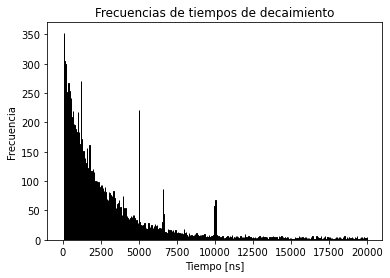

In [192]:
#plt.plot(Time[240:260],frec[240:260])
#plt.plot(Time_f,frec_def)
#plt.ylabel('Frecuencia')
#plt.xlabel('Tiempo [ns]')
plt.hist(Time_f, bins=len(Time_f), weights=frec_def, edgecolor='black')
plt.title('Frecuencias de tiempos de decaimiento')
plt.xlabel('Tiempo [ns]')
plt.ylabel('Frecuencia')

In [153]:
suma = np.copy(frec_def)
for i in range(1,len(suma)):
    suma[i] += suma[i-1] 
SUM = suma[-1]
Rem_Particles = np.full(len(Time_f),SUM)-suma

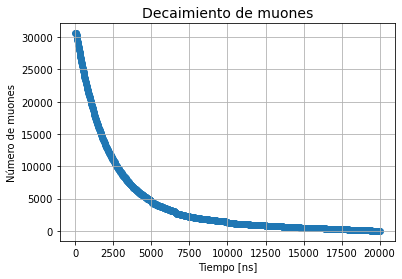

In [201]:
plt.scatter(Time_f,Rem_Particles)
plt.ylabel('Número de muones', fontsize =10)
plt.xlabel('Tiempo [ns]', fontsize =10)
plt.title('Decaimiento de muones', fontsize =14)
plt.grid()

<ipython-input-232-f5a126a09c50>:2: RuntimeWarning: divide by zero encountered in log
  Ajustado = np.log(Ajust)


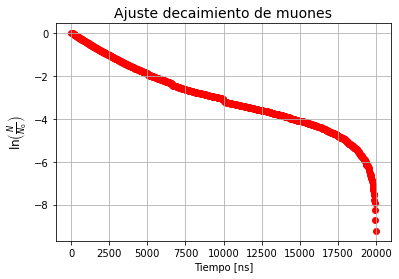

In [232]:
Ajust = Rem_Particles/Rem_Particles[0]
Ajustado = np.log(Ajust)
plt.scatter(Time_f,Ajustado,color='r')
plt.ylabel(r'$\ln\left(\frac{N}{N_0}\right)$', fontsize =12)
plt.xlabel('Tiempo [ns]', fontsize =10)
plt.title('Ajuste decaimiento de muones', fontsize =14)
plt.grid()

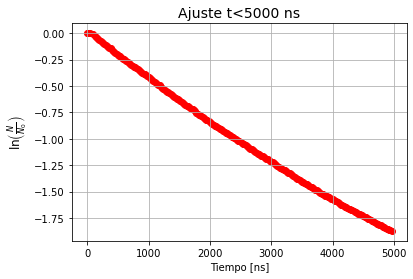

In [233]:
plt.scatter(Time_f[0:247],Ajustado[0:247], color='r')
plt.ylabel(r'$\ln\left(\frac{N}{N_0}\right)$', fontsize =12)
plt.xlabel('Tiempo [ns]', fontsize =10)
plt.title('Ajuste t<5000 ns', fontsize =14)
plt.grid()

In [235]:
Regresion  = linregress(Time_f[0:247],Ajustado[0:247])
#Regresion  = linregress(Time,Ajustado)
T_decay = -1/Regresion.slope
stderr_exp = 1.96*Regresion.stderr*(1/Regresion.slope**2)
print(T_decay)
print(Regresion.rvalue)
print(stderr_exp)

2608.092441279368
-0.9984492123974976
18.20927895301911


In [243]:
exactitud = np.abs(2.2-T_decay/1000)/(stderr_exp/1000)
precision = 100*(stderr_exp/T_decay)
print(exactitud)
print(precision)

22.41123563059622
0.6981838014946575
